In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score

In [6]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
import pandas as pd
dataset = pd.read_excel('/content/gdrive/MyDrive/online_retail.xlsx')

In [8]:
dataset.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [9]:
dataset.shape


(525461, 8)

In [10]:
 dataset.head(10)



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [11]:
print("Number of customers are ",len(dataset["Customer ID"].value_counts()))

Number of customers are  4383


In [12]:
dataset = dataset[(dataset['Quantity']>0)]

dataset.describe()

,Quantity,Price,Customer ID
count,513135.000000,513135.000000,407695.000000
mean,11.715412,3.973446,15368.504107
std,92.974635,127.952849,1679.795700
min,1.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13997.000000
50%,3.000000,2.100000,15321.000000
75%,10.000000,4.210000,16812.000000
max,19152.000000,25111.090000,18287.000000


In [13]:
Country_quantity = dataset["Country"].value_counts()
Country_quantity

United Kingdom          474938
EIRE                      9460
Germany                   7661
France                    5532
Netherlands               2730
Spain                     1235
Switzerland               1170
Portugal                  1061
Belgium                   1038
Sweden                     887
Channel Islands            821
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Hong Kong                   74
Israel  

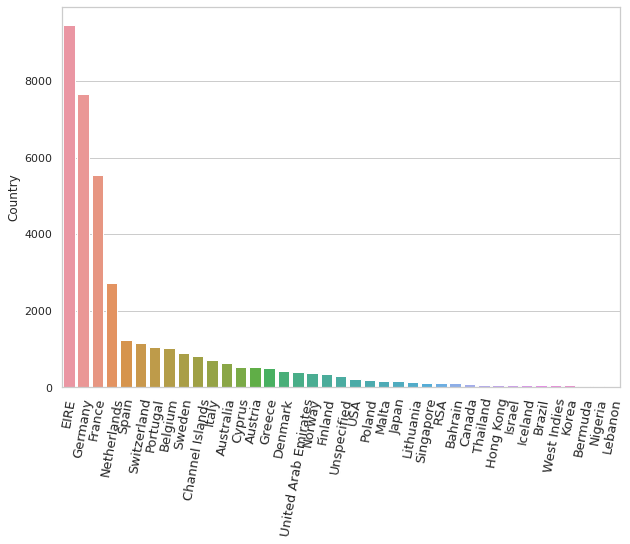

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=80,size=13)
sns.barplot(x=Country_quantity.index[1:], y=Country_quantity[1:])
plt.show()

In [15]:
    import datetime as dt
    # month_info = pd.DataFrame(dataset['InvoiceDate'].dt.month)
    # year_info = pd.DataFrame(dataset['InvoiceDate'].dt.year)
    # new = pd.concat([month_info,year_info],axis=1)
    #temp = pd.to_datetime(month_info,year_info.assign(Day=1))
    #temp= pd.to_datetime(dataset[['year', 'month']].assign(Day=1))
    # dataset['revenue'] = dataset['Price'] * dataset['Quantity']
    temp = list(map(lambda x: x.strftime("%Y-%m"),dataset["InvoiceDate"].copy()))
    #temp = pd.to_datetime(dataset["InvoiceDate"].copy(),format="%Y-%m-%d")
    dataset["month_year"] = temp


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

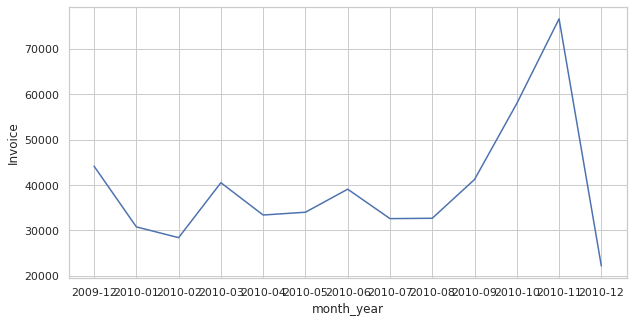

In [17]:
plot = pd.DataFrame(dataset.groupby(['month_year'])['Invoice'].count()).reset_index()
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="month_year", y="Invoice", data = plot)
plt.show()


In [18]:
dataset["revenue"] = dataset["Price"]*dataset["Quantity"]
dataset["revenue"]

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
525456      5.90
525457      3.75
525458      3.75
525459      7.50
525460      3.90
Name: revenue, Length: 513135, dtype: float64

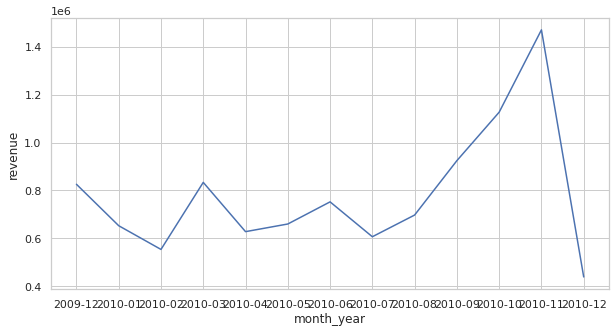

In [19]:
data_temp = pd.DataFrame(dataset.groupby(['month_year'])['revenue'].sum()).reset_index()
plt.figure(figsize=(10,5))
ax = sns.lineplot(x = 'month_year', y='revenue', data = data_temp)

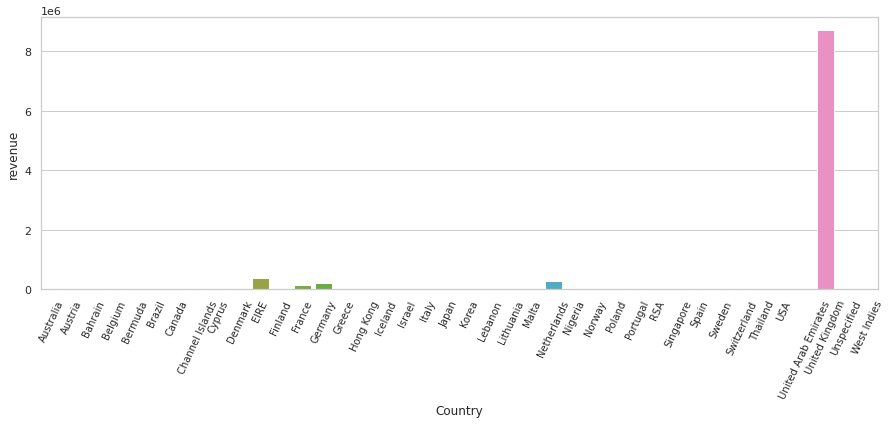

In [20]:
data_temp2 = pd.DataFrame(dataset.groupby(['Country'])['revenue'].sum()).reset_index()
plt.figure(figsize=(15,5))
ax=sns.barplot(x='Country', y='revenue',data=data_temp2)
plt.xticks(rotation=65,size=10)
plt.show()

In [21]:
dataset.columns



Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'month_year', 'revenue'],
      dtype='object')

In [32]:
dataset['Customer ID'] = dataset['Customer ID'].astype(str)
dataset['Amount'] = dataset['Quantity']*dataset['Price']
rfm_dataset_monetary = dataset.groupby('Customer ID')['Amount'].sum()
rfm_dataset_monetary.reset_index()
rfm_dataset_monetary.columns = ['Customer ID', 'Amount']
print(rfm_dataset_monetary)

Customer ID
12346.0        372.86
12347.0       1323.32
12348.0        222.16
12349.0       2671.14
12351.0        300.93
              ...    
18284.0        461.68
18285.0        427.00
18286.0       1296.43
18287.0       2345.71
nan        1337710.30
Name: Amount, Length: 4315, dtype: float64


In [33]:
rfm_dataset_frequency =  dataset[['Customer ID','Invoice']].groupby(['Customer ID','Invoice']).count()
rfm_dataset_frequency = rfm_dataset_frequency.reset_index().groupby(["Customer ID"]).count().reset_index()
rfm_dataset_frequency.columns = ['Customer ID', 'Frequency']
print(rfm_dataset_frequency)

     Customer ID  Frequency
0        12346.0         11
1        12347.0          2
2        12348.0          1
3        12349.0          3
4        12351.0          1
...          ...        ...
4310     18284.0          1
4311     18285.0          1
4312     18286.0          2
4313     18287.0          4
4314         nan       2889

[4315 rows x 2 columns]


In [34]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(dataset['InvoiceDate'])
dataset['Diff'] = max_date - dataset['InvoiceDate']
rfm_dataset_recency = dataset.groupby('Customer ID')['Diff'].min()
rfm_dataset_recency = rfm_dataset_recency.reset_index()
rfm_dataset_recency.columns = ['Customer ID','Diff']
rfm_dataset_recency['Diff'] = rfm_dataset_recency['Diff'].dt.days
print(rfm_dataset_recency)

     Customer ID  Diff
0        12346.0   164
1        12347.0     2
2        12348.0    73
3        12349.0    42
4        12351.0    10
...          ...   ...
4310     18284.0    66
4311     18285.0   295
4312     18286.0   111
4313     18287.0    17
4314         nan     0

[4315 rows x 2 columns]


In [35]:
rfm_dataset_final = pd.merge(rfm_dataset_monetary,rfm_dataset_frequency,on='Customer ID',how='inner')
rfm_dataset_final = pd.merge(rfm_dataset_final,rfm_dataset_recency,on='Customer ID',how='inner')
rfm_dataset_final.columns = ['Customer ID', 'Amount', 'Frequency', 'Recency']
print(rfm_dataset_final)

     Customer ID      Amount  Frequency  Recency
0        12346.0      372.86         11      164
1        12347.0     1323.32          2        2
2        12348.0      222.16          1       73
3        12349.0     2671.14          3       42
4        12351.0      300.93          1       10
...          ...         ...        ...      ...
4310     18284.0      461.68          1       66
4311     18285.0      427.00          1      295
4312     18286.0     1296.43          2      111
4313     18287.0     2345.71          4       17
4314         nan  1337710.30       2889        0

[4315 rows x 4 columns]


In [36]:
rfm_dataset_final.shape

(4315, 4)

In [37]:
Q1 = rfm_dataset_final.Amount.quantile(0.05)
Q3 = rfm_dataset_final.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm_dataset_final = rfm_dataset_final[(rfm_dataset_final.Amount >= Q1 - 1.5*IQR) & (rfm_dataset_final.Amount <= Q3 + 1.5*IQR)]


In [38]:
Q1 = rfm_dataset_final.Recency.quantile(0.05)
Q3 = rfm_dataset_final.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_dataset_final = rfm_dataset_final[(rfm_dataset_final.Recency >= Q1 - 1.5*IQR) & (rfm_dataset_final.Recency <= Q3 + 1.5*IQR)]

In [39]:
Q1 = rfm_dataset_final.Frequency.quantile(0.05)
Q3 = rfm_dataset_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_dataset_final = rfm_dataset_final[(rfm_dataset_final.Frequency >= Q1 - 1.5*IQR) & (rfm_dataset_final.Frequency <= Q3 + 1.5*IQR)]

In [40]:
X = rfm_dataset_final[['Amount', 'Frequency', 'Recency']]
scaler = MinMaxScaler()
rfm_dataset_scaled = scaler.fit_transform(X)

In [41]:
rfm_dataset_scaled = pd.DataFrame(rfm_dataset_scaled)
rfm_dataset_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_dataset_scaled.head()

,Amount,Frequency,Recency
0,0.024629,0.370370,0.439678
1,0.087409,0.037037,0.005362
2,0.014674,0.000000,0.195710
3,0.176437,0.074074,0.112601
4,0.019877,0.000000,0.026810


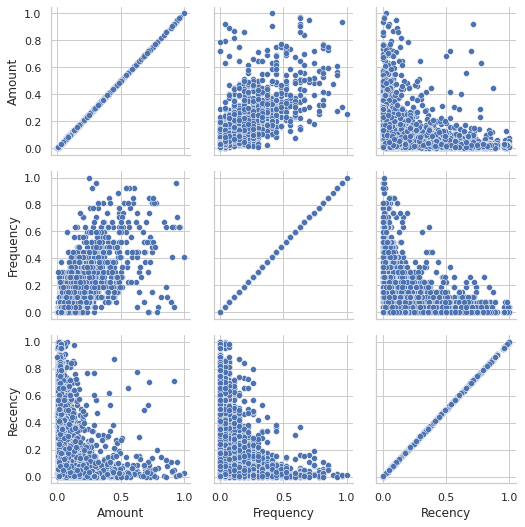

In [42]:
g = sns.PairGrid(rfm_dataset_scaled)
g.map(sns.scatterplot);

In [43]:
within_sum_square = []
range_n_clusters = [i for i in range(2,11)]
for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters, init ='k-means++', max_iter=300,random_state=42).fit(rfm_dataset_scaled)
        within_sum_square.append(kmeans.inertia_)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(rfm_dataset_scaled, cluster_labels)
        # c_avg = calinski_harabasz_score(rfm_dataset_scaled, cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5661945492047095
For n_clusters=3, the silhouette score is 0.5477575520199691
For n_clusters=4, the silhouette score is 0.4743336103129437
For n_clusters=5, the silhouette score is 0.4377793045333027
For n_clusters=6, the silhouette score is 0.3880489018428877
For n_clusters=7, the silhouette score is 0.381351139040909
For n_clusters=8, the silhouette score is 0.387409124390399
For n_clusters=9, the silhouette score is 0.37027024047295526
For n_clusters=10, the silhouette score is 0.35262500025185517


In [44]:
kmeans = KMeans(n_clusters=3, max_iter=300,init="k-means++",random_state=42)
kmeans.fit(rfm_dataset_scaled)
lbs = kmeans.labels_
print(kmeans.labels_)

[1 0 0 ... 1 0 0]


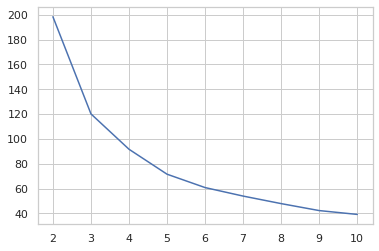

In [45]:
plt.plot(range_n_clusters,within_sum_square)
plt.show()

In [46]:
rfm_dataset_final['Cluster_Id'] = lbs
rfm_dataset_final.head()

,Customer ID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,372.86,11,164,1
1,12347.0,1323.32,2,2,0
2,12348.0,222.16,1,73,0
3,12349.0,2671.14,3,42,0
4,12351.0,300.93,1,10,0


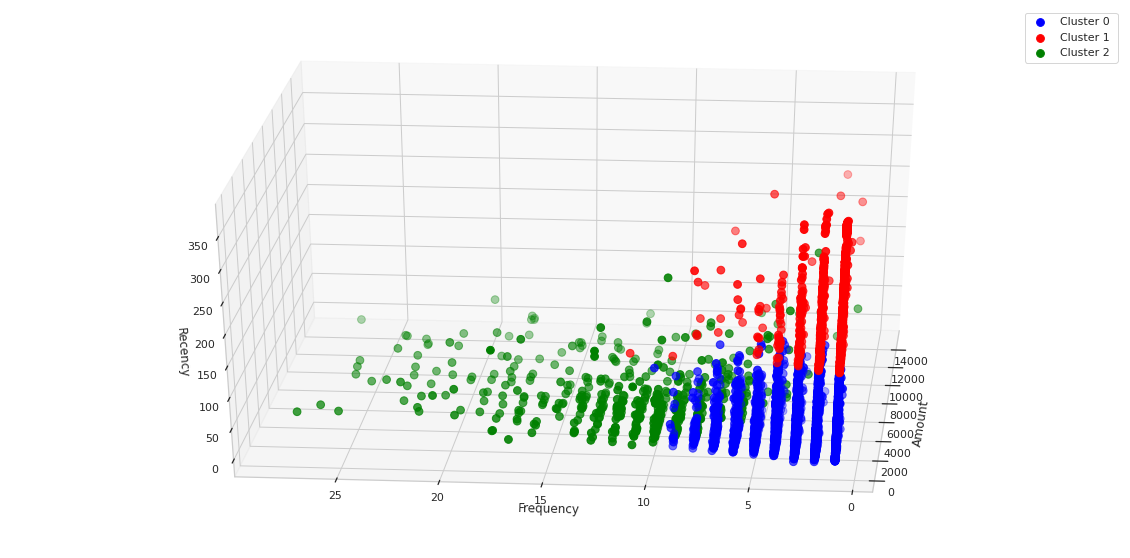

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
     
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_dataset_final["Amount"][rfm_dataset_final.Cluster_Id == 0], rfm_dataset_final["Frequency"][rfm_dataset_final.Cluster_Id == 0],  rfm_dataset_final["Recency"][rfm_dataset_final.Cluster_Id == 0], c='blue', s=60)
ax.scatter(rfm_dataset_final["Amount"][rfm_dataset_final.Cluster_Id == 1], rfm_dataset_final["Frequency"][rfm_dataset_final.Cluster_Id == 1], rfm_dataset_final["Recency"][rfm_dataset_final.Cluster_Id == 1], c='red', s=60)
ax.scatter(rfm_dataset_final["Amount"][rfm_dataset_final.Cluster_Id == 2], rfm_dataset_final["Frequency"][rfm_dataset_final.Cluster_Id == 2], rfm_dataset_final["Recency"][rfm_dataset_final.Cluster_Id == 2], c='green', s=60)
ax.view_init(30, 185)
plt.legend(("Cluster 0 ","Cluster 1","Cluster 2"))
plt.xlabel("Amount")
plt.ylabel("Frequency")
ax.set_zlabel('Recency')
plt.show()

In [48]:
rfm_dataset_af = rfm_dataset_scaled[["Amount","Frequency"]].copy()
rfm_dataset_af

,Amount,Frequency
0,0.024629,0.370370
1,0.087409,0.037037
2,0.014674,0.000000
3,0.176437,0.074074
4,0.019877,0.000000
...,...,...
4232,0.042391,0.185185
4233,0.030495,0.000000
4234,0.028205,0.000000
4235,0.085633,0.037037


In [49]:
d2kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
init = 'k-means++',             # Initialization method for kmeans
max_iter = 100)              # Maximum number of iterations            )               # Choose random state for reproducibility


In [50]:
pred_y =d2kmeans.fit_predict(rfm_dataset_af)

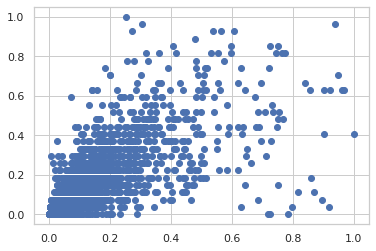

In [51]:
plt.scatter(rfm_dataset_scaled["Amount"], 
rfm_dataset_scaled["Frequency"])

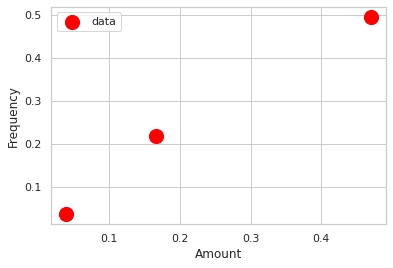

In [52]:
plt.scatter(d2kmeans.cluster_centers_[:, 0], 
                d2kmeans.cluster_centers_[:, 1], 
                s=200,                             # Set centroid size
                c='red')
plt.legend(["data","centroid"])          
plt.xlabel("Amount")
plt.ylabel("Frequency")                 # Set centroid color
plt.show()


In [53]:
rfm_copy = rfm_dataset_af.copy()
rfm_copy["Cluster_Id"]= pred_y
rfm_copy.head()

,Amount,Frequency,Cluster_Id
0,0.024629,0.370370,1
1,0.087409,0.037037,0
2,0.014674,0.000000,0
3,0.176437,0.074074,0
4,0.019877,0.000000,0


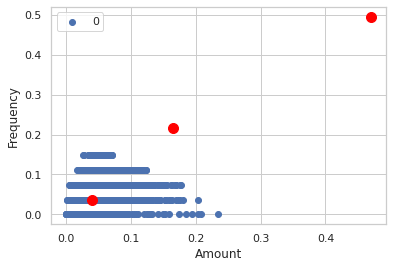

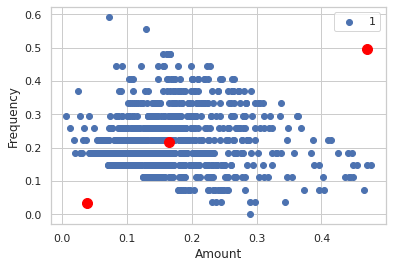

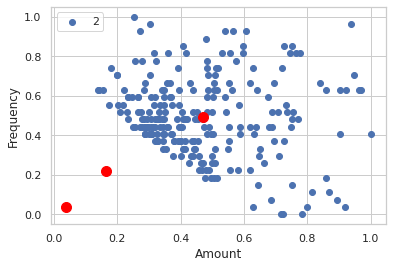

In [54]:
u_labels = np.unique(pred_y)
     
    #plotting the results:

for i in u_labels:
    plt.scatter(rfm_copy[pred_y == i]['Amount'] ,rfm_copy[pred_y==i]['Frequency'],label=i)
    plt.scatter(d2kmeans.cluster_centers_[:, 0], 
                d2kmeans.cluster_centers_[:, 1], 
                s=100,                             # Set centroid size
                c='red') 
    plt.legend()
    plt.xlabel("Amount")
    plt.ylabel("Frequency") 
    plt.show()

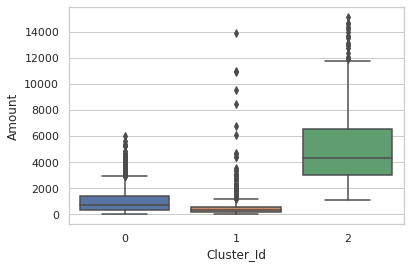

In [55]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm_dataset_final)
plt.show()


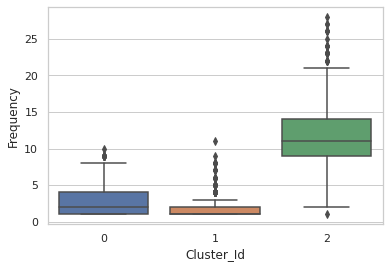

In [56]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_dataset_final)
plt.show()


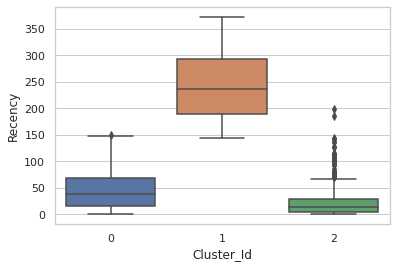

In [57]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_dataset_final)
plt.show()
